In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [45]:
def import_file():
    # Take user input for the file name
    global file_name 
    file_name = input("Enter the file name with .csv to import: ")

    # Check if the file exists
    if os.path.exists(file_name):
        # File exists, so import it
        df = pd.read_csv(file_name)
        print("File imported successfully.")
        return df
    else:
        # File does not exist, give warning
        print("File not found. Please enter a valid file name.")
        return None

# Call the function to import the file
df = import_file()


Enter the file name with .csv to import: recipes1.csv
File imported successfully.


In [46]:
# Print the dataset before cleaning
print("Dataset before cleaning:")
print(df)

Dataset before cleaning:
           Recipe Name                                        Ingredients
0  Spaghetti Bolognese  Pasta, Ground beef, Tomato sauce, Onion, Garli...
1         Caesar Salad  Romaine lettuce, Croutons, Parmesan cheese, Ca...
2   Vegetable Stir-Fry  Mixed vegetables, Tofu, Soy sauce, Ginger, Gar...
3  Spaghetti Bolognese  Pasta, Ground beef, Tomato sauce, Onion, Garli...
4        Chicken Curry  Chicken, Curry powder, Coconut milk, Onion, Ga...


In [47]:
# Data Preprocessing
df = df.drop_duplicates()
df = df.astype(str)
df["Ingredients"] = df["Ingredients"].str.lower()
df["Ingredients"] = df["Ingredients"].str.replace("[^a-zA-Z\d\s]", "", regex=True)
df["Ingredients"] = df["Ingredients"].str.split()

In [48]:
# Print the dataset after cleaning
print("\nDataset after cleaning:")
#print(df.head())
print(df)


Dataset after cleaning:
           Recipe Name                                        Ingredients
0  Spaghetti Bolognese  [pasta, ground, beef, tomato, sauce, onion, ga...
1         Caesar Salad  [romaine, lettuce, croutons, parmesan, cheese,...
2   Vegetable Stir-Fry  [mixed, vegetables, tofu, soy, sauce, ginger, ...
4        Chicken Curry  [chicken, curry, powder, coconut, milk, onion,...


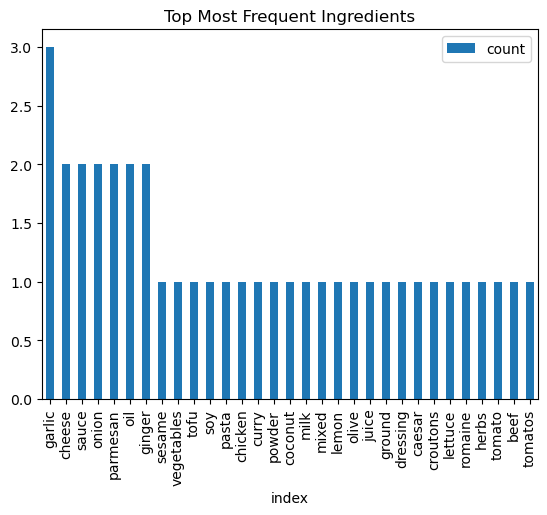

In [49]:
# Further Analysis
ingredient_counts = df["Ingredients"].explode().value_counts().reset_index(name="count")
top_ingredients = ingredient_counts[ingredient_counts["count"] >= 1]
top_ingredients.plot(x="index", y="count", kind="bar")
plt.title("Top Most Frequent Ingredients")
plt.show()

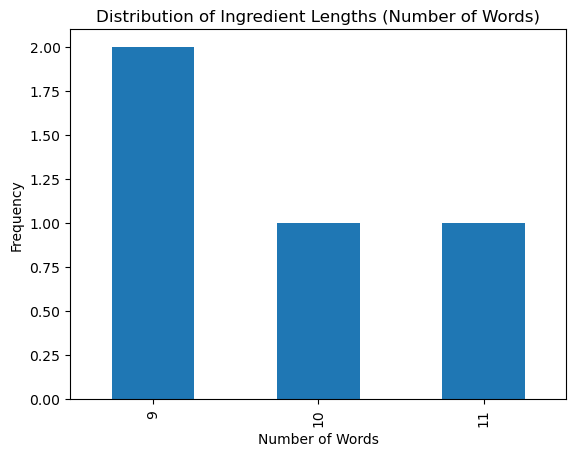

In [50]:
ingredient_lengths = df["Ingredients"].str.len()
ingredient_lengths.value_counts().plot(kind="bar")
plt.title("Distribution of Ingredient Lengths (Number of Words)")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()

In [51]:
# Define common allergens
allergen_list = ["milk", "eggs", "peanuts", "soy", "wheat", "fish", "crustaceans", "tree nuts", "sesame seeds"]


In [52]:
# Identify recipes containing allergens
df["contains_allergens"] = df["Ingredients"].apply(lambda ingredients: any(allergen in ingredients for allergen in allergen_list))


In [53]:
# Create a dictionary to store allergen counts per recipe
recipe_allergen_counts = {}
for index, row in df.iterrows():
    recipe_name = row["Recipe Name"]
    ingredients = row["Ingredients"]
    present_allergens = [allergen for allergen in allergen_list if allergen in ingredients]
    if recipe_name not in recipe_allergen_counts:
        recipe_allergen_counts[recipe_name] = {}
    for allergen in present_allergens:
        if allergen in recipe_allergen_counts[recipe_name]:
            recipe_allergen_counts[recipe_name][allergen] += 1
        else:
            recipe_allergen_counts[recipe_name][allergen] = 1

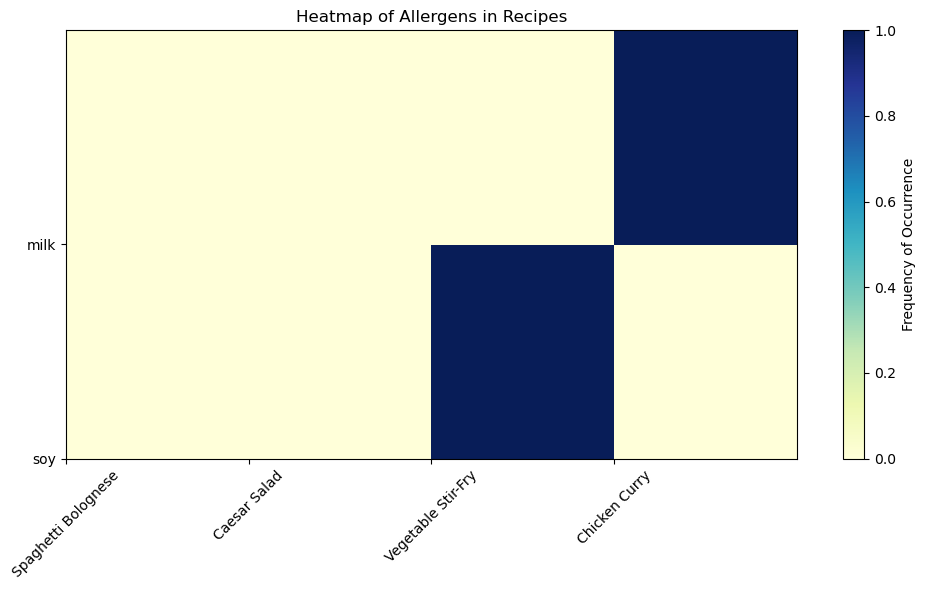

In [54]:
# Heatmap visualization
df_allergens = pd.DataFrame(recipe_allergen_counts).fillna(0)
plt.figure(figsize=(10, 6))
plt.pcolor(df_allergens, vmin=0, vmax=df_allergens.max().max(), cmap='YlGnBu')
plt.colorbar(label='Frequency of Occurrence')
plt.xticks(range(len(df_allergens.columns)), df_allergens.columns, rotation=45)
plt.yticks(range(len(df_allergens.index)), df_allergens.index)
plt.title("Heatmap of Allergens in Recipes")
plt.tight_layout()
plt.show()

In [55]:
import tkinter as tk
from tkinter import messagebox

# Read the dataset
df = pd.read_csv(file_name)

# Function to calculate ingredient percentages and display results
def calculate_percentages():
    user_ingredient = ingredient_entry.get().lower()
    found = False

    # Create a dictionary to store the percentage of the user's ingredient in each recipe
    ingredient_percentages = {}

    # Iterate through each recipe
    for index, row in df.iterrows():
        recipe_name = row["Recipe Name"]
        ingredients = row["Ingredients"]

        # Check if the user's ingredient matches any of the ingredients in the recipe
        if user_ingredient in ingredients.lower():
            found = True

            # Count the number of times the user's ingredient appears in the recipe
            ingredient_count = ingredients.lower().count(user_ingredient)

            # Calculate the percentage of the user's ingredient in the recipe
            total_ingredients = len(ingredients.split(","))
            percentage = (ingredient_count / total_ingredients) * 100

            # Store the percentage in the dictionary
            ingredient_percentages[recipe_name] = percentage

    # If the user's ingredient is not found in any recipe, show an error message
    if not found:
        messagebox.showerror("Error", f"The ingredient '{user_ingredient}' was not found in any recipes.")
    else:
        # Display results in a new window
        result_window = tk.Toplevel(root)
        result_window.title(f"Percentage of '{user_ingredient}' in Recipes")
        
         # Increase the size of the window
        result_window.geometry("400x100")  # Adjust the dimensions as needed

        for i, (recipe, percentage) in enumerate(ingredient_percentages.items()):
            tk.Label(result_window, text=f"{recipe}: {percentage:.2f}%").grid(row=i, column=0, sticky="w")

# Create the main window
root = tk.Tk()
root.title("Food Ingredient Analysis by Nitish and Rahul")

# Create a label and entry field for user input
big_font = ("Helvetica", 15)
ingredient_label = tk.Label(root, text="Enter the ingredient:",font=big_font)
ingredient_label.grid(row=0, column=0, padx=100, pady=100)

ingredient_entry = tk.Entry(root,font=big_font)
ingredient_entry.grid(row=0, column=1, padx=10, pady=10)

# Create a button to trigger calculation
calculate_button = tk.Button(root, text="Calculate Percentages",font=big_font, command=calculate_percentages)
calculate_button.grid(row=1, column=0, columnspan=2, pady=10)

# Run the GUI
root.mainloop()


In [56]:
import sqlite3

# Step 1: Read the CSV file into a DataFrame
df = pd.read_csv(file_name)

# Prompt the user to decide whether to save the data to the database
save_to_database = input("Do you want to save the data to the database? (yes/no): ").lower()

if save_to_database == 'yes':
    # Step 2: Connect to the SQLite database
    dbname=input("Enter database name with .db extension")
    conn = sqlite3.connect(dbname)

    # Step 3: Create a table in the database
    # Adjust the column names and data types based on your DataFrame
    df.to_sql('Recipes', conn, if_exists='replace', index=False)

    # Step 4: Commit changes and close the connection
    conn.commit()
    conn.close()
    print("Data has been saved to the database.")
else:
    print("Data will not be saved to the database.")


Do you want to save the data to the database? (yes/no): yes
Enter database name with .db extensionnew_recipe.db
Data has been saved to the database.


In [57]:
# Prompt the user to decide whether to view the data from the database
view_from_database = input("Do you want to view the data from the database? (yes/no): ").lower()

if view_from_database == 'yes':
    # Step 5: Connect to the SQLite database and retrieve the data
    conn = sqlite3.connect(dbname)
    query = "SELECT * FROM Recipes"
    db_df = pd.read_sql_query(query, conn)

    # Step 6: Display the data
    print("Data from the database:")
    print(db_df)
    conn.close()
else:
    print("Data from the database will not be viewed.")

Do you want to view the data from the database? (yes/no): yes
Data from the database:
           Recipe Name                                        Ingredients
0  Spaghetti Bolognese  Pasta, Ground beef, Tomato sauce, Onion, Garli...
1         Caesar Salad  Romaine lettuce, Croutons, Parmesan cheese, Ca...
2   Vegetable Stir-Fry  Mixed vegetables, Tofu, Soy sauce, Ginger, Gar...
3  Spaghetti Bolognese  Pasta, Ground beef, Tomato sauce, Onion, Garli...
4        Chicken Curry  Chicken, Curry powder, Coconut milk, Onion, Ga...
